In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from keras.datasets import cifar10

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
#0. Airplanes
#1. Cars
#2. Birds
#3. Cats
#4. Deers
#5. Dogs
#6. Frogs
#7. Horses
#8. Ships
#9. Trucks

In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
#50,000 images, each image consists 32x32 and 3 channels

In [6]:
X_train.shape

(50000, 32, 32, 3)

In [7]:
X_test.shape

(10000, 32, 32, 3)

In [8]:
y_train.shape

(50000, 1)

In [9]:
y_test.shape

(10000, 1)

In [10]:
#Data Visualization

[0]


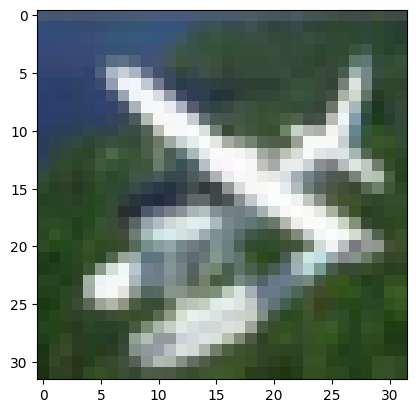

In [11]:
i = 2345
plt.imshow(X_train[i])
print(y_train[i]) #x represents the image, y represents the class

In [12]:
W_grid = 15

In [13]:
L_grid = 15

/opt/anaconda3/envs/tf_env/lib/python3.8/site-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


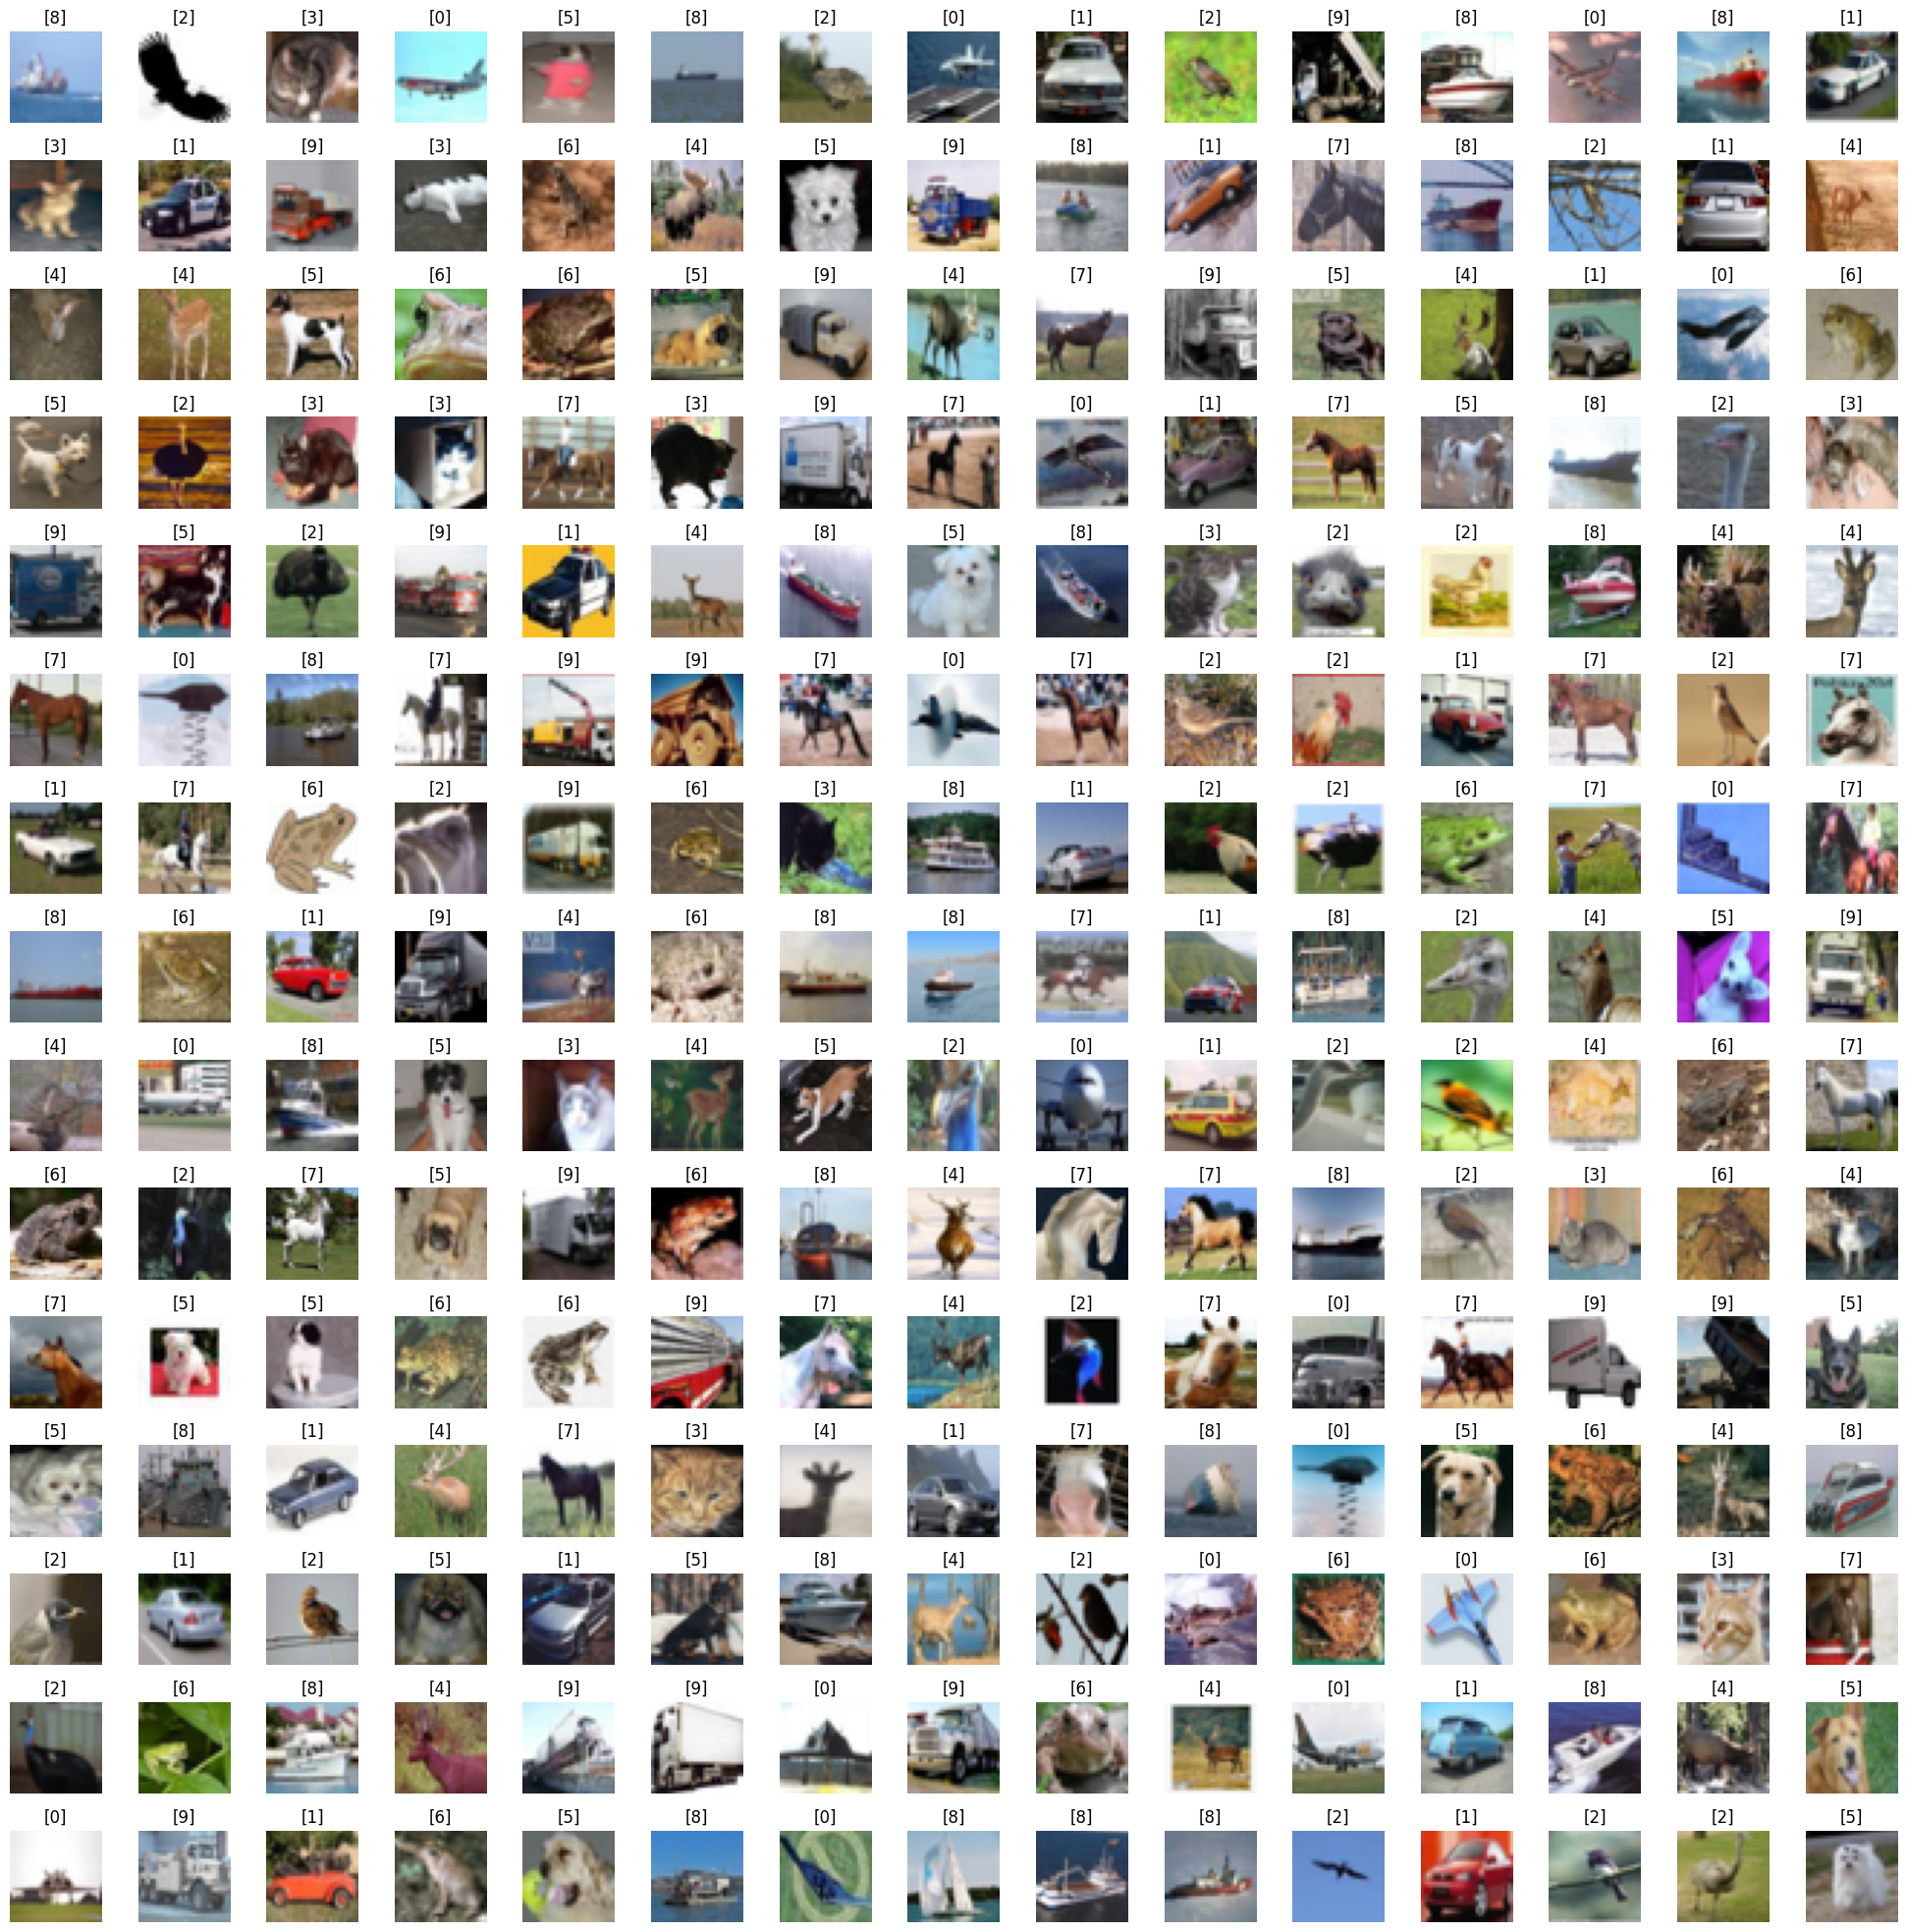

In [14]:
fig, axes = plt.subplots(L_grid, W_grid, figsize = (25, 25))
axes = axes.ravel()

n_training = len(X_train)

for x in np.arange(0, L_grid * W_grid): # Adding a random image in each cell in the 15x15 grid
    index = np.random.randint(0, n_training) # Picking a random number
    axes[x].imshow(X_train[index])
    axes[x].set_title(y_train[index])
    axes[x].axis('off')
plt.subplots_adjust(hspace = 0.4)

In [15]:
n_training

50000

In [16]:
# Data preparation

In [17]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [18]:
number_cat = 10

In [19]:
import keras
y_train = keras.utils.to_categorical(y_train, number_cat)
y_test = keras.utils.to_categorical(y_test, number_cat)

In [20]:
X_train = X_train/255# Data normalization
X_test = X_test/255

In [21]:
X_train.shape

(50000, 32, 32, 3)

In [22]:
Input_shape = X_train.shape[1:]

In [23]:
Input_shape


(32, 32, 3)

In [24]:
# training the model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard 

#Keras flow as the API and tensorflow as the backend

In [25]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = "relu", input_shape = Input_shape)) #feature detection, applying filter
cnn_model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = "relu")) #Adding convolutional layers
cnn_model.add(MaxPooling2D(2,2)) #maxpooling
cnn_model.add(Dropout(0.4)) #dropping out for efficiency


cnn_model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = "relu")) #feature detection, applying filter
cnn_model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = "relu"))
cnn_model.add(MaxPooling2D(2,2)) #maxpooling
cnn_model.add(Dropout(0.4)) 

cnn_model.add(Flatten())

cnn_model.add(Dense(units=512, activation='relu'))

cnn_model.add(Dense(units=512, activation='relu'))

cnn_model.add(Dense(units=10, activation='softmax'))

In [26]:
cnn_model.compile(
    loss='categorical_crossentropy',
    optimizer= keras.optimizers.legacy.RMSprop(learning_rate=0.001),
    metrics=['accuracy']
)
y_test.shape

(10000, 10)

In [27]:

history = cnn_model.fit(X_train, y_train, batch_size=16, epochs=2, shuffle=True)

Epoch 1/2
3125/3125 [==============================] - 30s 9ms/step - loss: 1.6128 - accuracy: 0.4156
Epoch 2/2
3125/3125 [==============================] - 34s 11ms/step - loss: 1.3536 - accuracy: 0.5284


In [28]:
# Evaluating the model
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1])) # has to be new data (testing data), prevents overfitting


313/313 [==============================] - 2s 5ms/step - loss: 1.2096 - accuracy: 0.5638
Test Accuracy: 0.5637999773025513


In [29]:

predicted_classes = cnn_model.predict(X_test) #tells what are the predicted classes
predicted_classes = np.argmax(predicted_classes, axis=1)


313/313 [==============================] - 1s 5ms/step


In [30]:
X_test = X_test

In [31]:
y_test = y_test.argmax(1)


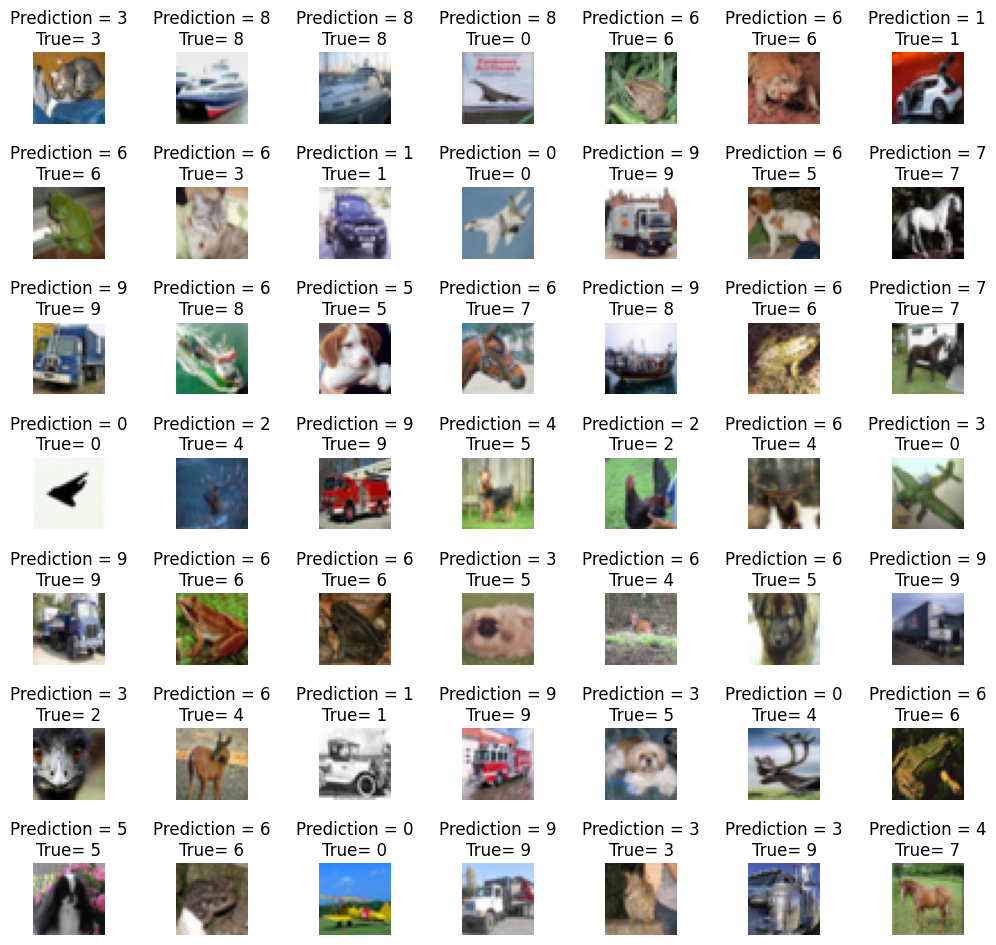

In [32]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()
for i in np.arange(0,  L*W):
  axes[i].imshow(X_test[i])
  axes[i].set_title('Prediction = {}\nTrue= {}'.format(predicted_classes[i], y_test[i]))
  axes[i].axis('off')

plt.subplots_adjust(wspace= 1)



In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

<Axes: >

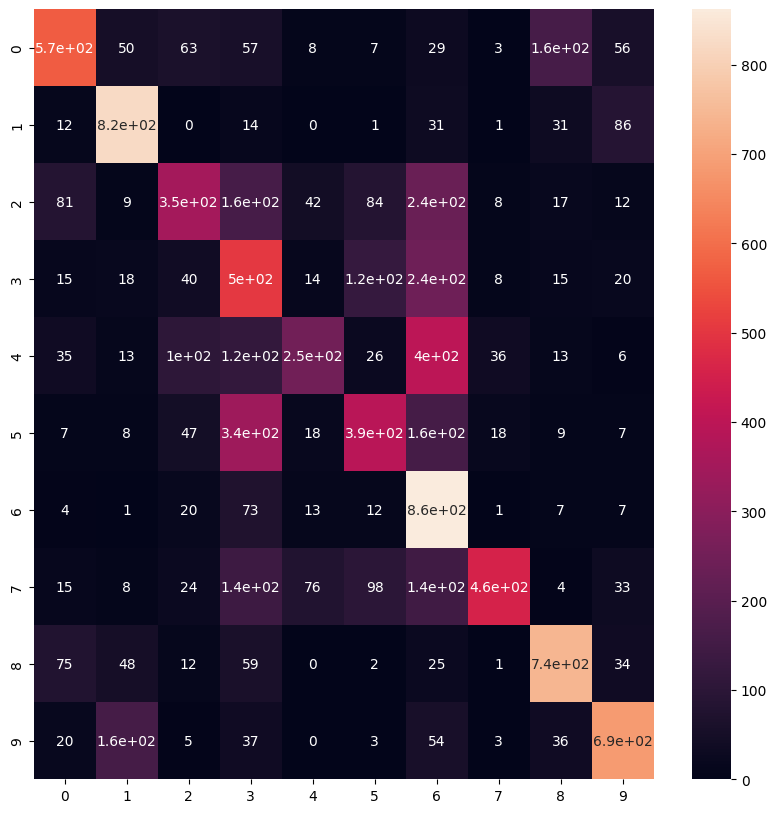

In [34]:
cm = confusion_matrix(y_test, predicted_classes)
cm
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True)

In [35]:
# Saving the model

In [36]:
import os
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model.h5')
cnn_model.save(model_path)
     

/opt/anaconda3/envs/tf_env/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [37]:
# data augmentation

In [38]:
import keras
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [39]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train.shape

(50000, 32, 32, 3)

In [40]:
n=15
X_train_sample = X_train[:n]

In [41]:
X_train_sample.shape

(15, 32, 32, 3)

In [42]:
from keras.preprocessing.image import ImageDataGenerator
dataget_train = ImageDataGenerator(rotation_range = 90)
dataget_train = ImageDataGenerator(vertical_flip = True)
dataget_train = ImageDataGenerator(brightness_range = (1,5))
dataget_train.fit(X_train)

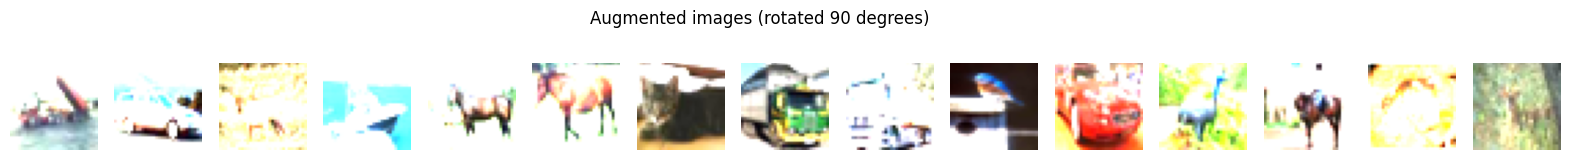

In [43]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 2))
for x_batch in dataget_train.flow(X_train_sample, batch_size=n):
    for i in range(0, n):
        ax = fig.add_subplot(1, n, i + 1)
        ax.imshow(x_batch[i].astype('uint8'))
        ax.axis('off')
    fig.suptitle('Augmented images (rotated 90 degrees)')
    plt.show()
    break


In [44]:
# training model using augmenented dataset

In [93]:
datagen = ImageDataGenerator(rotation_range=90,
                             width_shift_range=0.1,
                             horizontal_flip=True,
                             vertical_flip=True)

In [ ]:
datagen.fit(X_train)

In [ ]:
cnn_model.fit_generator()